1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

The eigenvalues l and eigenvectors V obtained with eigendecomposition are: 
 [2.63822654e+01 6.26619742e-16 2.03290458e+00] 
 [[-0.11416776 -0.81649658  0.56594969]
 [-0.57897623 -0.40824829 -0.70577607]
 [-0.80731174  0.40824829  0.42612332]]
The eigenvalues l_svd and eigenvectors Vt obtained with SVD are: 
 [2.63883627e+01 2.03475550e+00 4.71714876e-31] 
 [[ 0.11424583  0.57887886  0.80737052]
 [ 0.56593394 -0.70585593  0.42601194]
 [ 0.81649658  0.40824829 -0.40824829]]
Are l and l_svd exactly equal? False
Are V and Vt exactly equal? False
Eigenvalues with eigendecomposition: 
 [2.63822654e+01 6.26619742e-16 2.03290458e+00]
Eigenvalues with SVD: 
 [2.63883627e+01 2.03475550e+00 4.71714876e-31]
Eigenvectors with eigendecomposition: 
 [[-0.11416776 -0.81649658  0.56594969]
 [-0.57897623 -0.40824829 -0.70577607]
 [-0.80731174  0.40824829  0.42612332]]
Eigenvectors with SVD: 
 [[ 0.11424583  0.57887886  0.80737052]
 [ 0.56593394 -0.70585593  0.42601194]
 [ 0.81649658  0.40824829 -0.4082

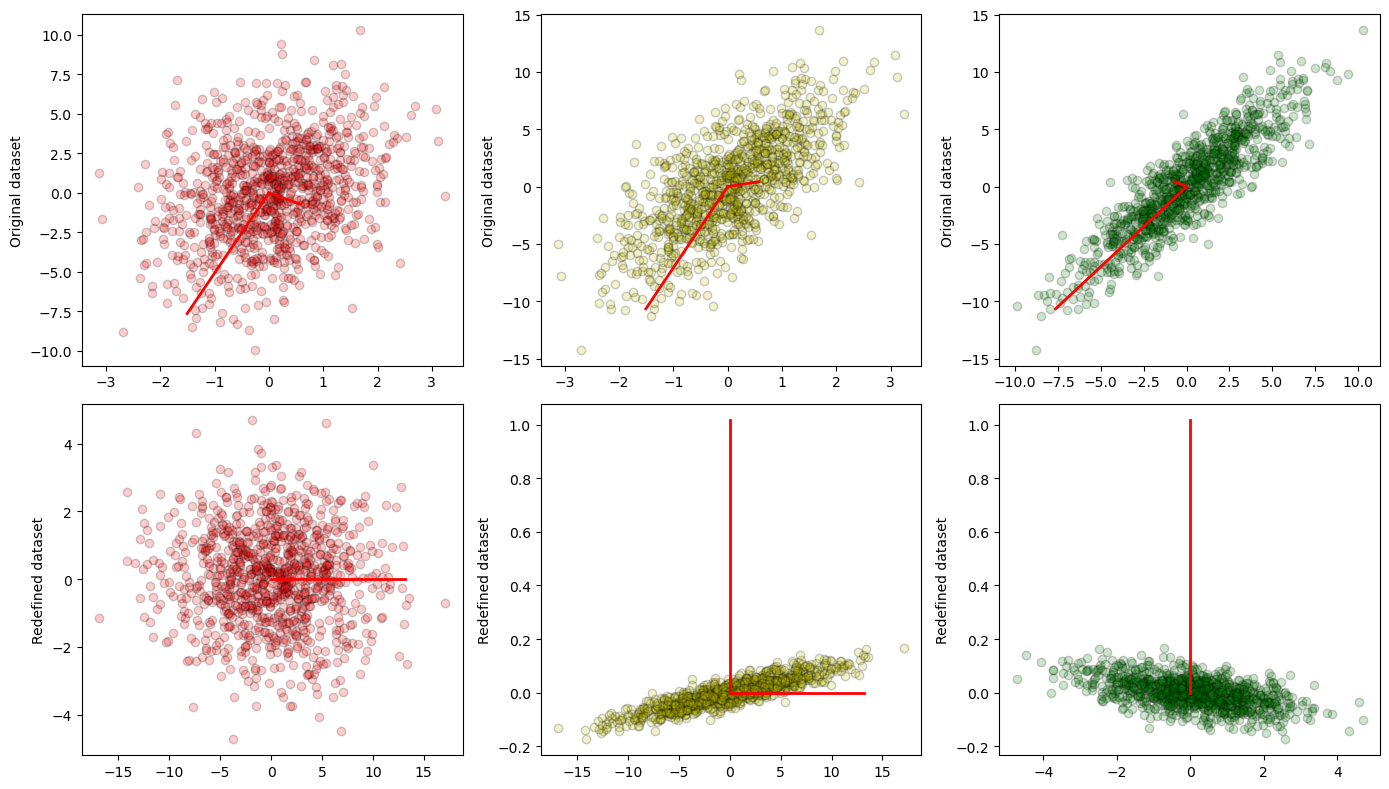

In [2]:
N = 1000
mu = 0
x1 = np.random.normal(mu, scale=1, size=N)
x2 = x1+ np.random.normal(mu, scale=3, size=N)
x3 = 2*x1+x2
data = []
for i in range(len(x1)):
    data.append([x1[i], x2[i], x3[i]])
data = np.array(data)
# PCA reduction with eigendecomposition
cov = np.cov(data, rowvar=False)
# cov = np.dot(data.T, data)/(N-1)
l, V = la.eig(cov) # l contains the eigenvalues whereas V contains the eigenvectors
l = np.real_if_close(l) # We take the real values of the eigenvalues, if possible
print("The eigenvalues l and eigenvectors V obtained with eigendecomposition are: \n", l, "\n", V)
# PCA reduction with SVD
U, S, Vt = la.svd(data) # Vt already contains the eigenvectors. We need to find the eigenvalues
l_svd = S**2/(N-1) #These are the eigenvalues
print("The eigenvalues l_svd and eigenvectors Vt obtained with SVD are: \n", l_svd, "\n", Vt)
# Check to see that the two procedures yield the same result
print("Are l and l_svd exactly equal?", np.allclose(l, l_svd))
print("Are V and Vt exactly equal?", np.allclose(V, Vt))
# As we can see from the results of the method allclose of numpy the values are not exactly the same, however they are very close.
print("Eigenvalues with eigendecomposition: \n", l)
print("Eigenvalues with SVD: \n", l_svd)
print("Eigenvectors with eigendecomposition: \n", V)
print("Eigenvectors with SVD: \n", Vt)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % abs((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))
print("As we can see from the values shown above, the component 0 is the one with which we can retain the largest percentage of the total variability.\
This result was expected because of the construction of the dataset: both the second and third feature contain a linear combination of the first \
feature. However it is still less than 99%, so we need to reduce the dimensionality of the dataset.")
idx = np.argsort(Vt)[::-1] # This sorts the eigenvalues in descending order
num_components = data[0].shape[0]-1 # I take one feature less than the original dataset
pve = np.sum(l_svd[:num_components] / np.sum(l_svd))
print("Proportion of variance explained by the first two PCs:", pve*100, "%")
new_data = data.dot(Vt)
fig, ax = plt.subplots(2, 3, figsize=(14, 8))
scale_factor = 0.5
ax[0,0].scatter(data[:,0], data[:,1], alpha=0.2, c='r', edgecolor='black')
for li, vi in zip(l, V.T):
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[0,1].scatter(data[:,0], data[:,2], alpha=0.2, c='y', edgecolor='black')
for li, vi in zip(l, V.T): 
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[0,2].scatter(data[:,1], data[:,2], alpha=0.2, c='g', edgecolor='black')
for li, vi in zip(l, V.T): 
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
for i in range(data[0].shape[0]):
    ax[0,i].set_ylabel('Original dataset')
ax[1,0].scatter(new_data[:,0], new_data[:,1], alpha=0.2, c='r', edgecolor='black') 
for li, vi in zip(l, np.dot(V.T, V)): 
    ax[1,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
ax[1,1].scatter(new_data[:,0], new_data[:,2], alpha=0.2, c='y', edgecolor='black')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax[1,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
ax[1,2].scatter(new_data[:,1], new_data[:,2], alpha=0.2, c='g', edgecolor='black')
for li, vi in zip(l, np.dot(V.T, V)): 
    ax[1,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
for i in range(data[0].shape[0]):
    ax[1,i].set_ylabel('Redefined dataset')
fig.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
std_noise = 0.01
noise = np.random.normal(0, std_noise, (1000, 10))
# Add the noise to the original data
noisy_data = np.concatenate((data, noise), axis=1)
print(noisy_data.shape, noisy_data)
cov = np.cov(noisy_data, rowvar=False)
# cov = np.dot(data.T, data)/(N-1)
l, V = la.eig(cov) # l contains the eigenvalues whereas V contains the eigenvectors
l = np.real_if_close(l) # We take the real values of the eigenvalues, if possible
print("The eigenvalues l and eigenvectors V obtained with eigendecomposition are: \n", l, "\n", V)
# PCA reduction with SVD
U, S, Vt = la.svd(noisy_data) # Vt already contains the eigenvectors. We need to find the eigenvalues
l_svd = S**2/(N-1) #These are the eigenvalues
print("The eigenvalues l_svd and eigenvectors Vt obtained with SVD are: \n", l_svd, "\n", Vt)
# Check to see that the two procedures yield the same result
print("Are l and l_svd exactly equal?", np.allclose(l, l_svd))
print("Are V and Vt exactly equal?", np.allclose(V, Vt))
# As we can see from the results of the method allclose of numpy the values are not exactly the same, however they are very close.
print("Eigenvalues with eigendecomposition: \n", l)
print("Eigenvalues with SVD: \n", l_svd)
print("Eigenvectors with eigendecomposition: \n", V)
print("Eigenvectors with SVD: \n", Vt)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
for i in range(len(Lambda)):
    print("By selecting the component ", i,", we retain %.2f%% of the total variability" % ((Lambda[i, i]/Lambda.trace())*100))
# print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
# print("By selecting the component 1, we retain %.2f%% of the total variability" % abs((Lambda[1, 1]/Lambda.trace())*100))
# print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))
print("The results are similar to those obtained in the first exercise: the noise components added do not represent a significative percentage of \
the total variability and can be ignorated.")

(1000, 13) [[-1.76435781e-01  2.34611913e+00  1.99324757e+00 ...  1.08400416e-02
   1.65863492e-02 -2.02756028e-02]
 [-9.00824468e-01 -2.75184010e+00 -4.55348904e+00 ...  6.82999676e-04
  -8.90730021e-03  1.07264512e-02]
 [ 3.77576593e-01 -4.27004696e+00 -3.51489377e+00 ... -8.37974434e-03
  -1.28287654e-02 -1.10915520e-03]
 ...
 [ 1.39904837e+00  2.08201062e-01  3.00629780e+00 ... -6.56248861e-03
  -1.89754484e-02  1.30905410e-02]
 [ 8.87517919e-01  3.74951576e+00  5.52455159e+00 ... -5.38229967e-03
   8.49251841e-03  2.96816450e-03]
 [ 1.61767525e-01  4.54982850e+00  4.87336355e+00 ... -4.16004222e-03
  -2.75092964e-03  1.46970326e-02]]
The eigenvalues l and eigenvectors V obtained with eigendecomposition are: 
 [2.63822668e+01 2.03290525e+00 2.73802259e-15 1.17679600e-04
 7.92490202e-05 1.12497446e-04 1.06961035e-04 8.81471082e-05
 9.08870665e-05 9.25292473e-05 9.88773623e-05 1.00251121e-04
 1.01682027e-04] 
 [[ 1.14167750e-01  5.65949610e-01 -8.16496581e-01  9.68662783e-05
   7.783

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

file1_name = "./data/magic04.data"
data = pd.read_csv(file1_name)
data = np.array(data.iloc[:,:-1])
# PCA reduction with eigendecomposition
cov = np.cov(data, rowvar=False)
# cov = np.dot(data.T, data)/(N-1)
l, V = la.eig(cov) # l contains the eigenvalues whereas V contains the eigenvectors
l = np.real_if_close(l) # We take the real values of the eigenvalues, if possible
print("The eigenvalues l and eigenvectors V obtained with eigendecomposition are: \n", l, "\n", V)
# PCA reduction with SVD
U, S, Vt = la.svd(data) # Vt already contains the eigenvectors. We need to find the eigenvalues
l_svd = S**2/(N-1) #These are the eigenvalues
print("The eigenvalues l_svd and eigenvectors Vt obtained with SVD are: \n", l_svd, "\n", Vt)
# Check to see that the two procedures yield the same result
print("Are l and l_svd exactly equal?", np.allclose(l, l_svd))
print("Are V and Vt exactly equal?", np.allclose(V, Vt))
# As we can see from the results of the method allclose of numpy the values are not exactly the same, however they are very close.
print("Eigenvalues with eigendecomposition: \n", l)
print("Eigenvalues with SVD: \n", l_svd)
print("Eigenvectors with eigendecomposition: \n", V)
print("Eigenvectors with SVD: \n", Vt)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
for i in range(len(Lambda)):
    print("By selecting the component ", i,", we retain %.2f%% of the total variability" % ((Lambda[i, i]/Lambda.trace())*100))
print("As we can see from the values shown above, the component 0 is the one with which we can retain the largest percentage of the total variability.\
From the results we can see that in order to describe the whole dataset we would just need the first 6 components.")
idx = np.argsort(Vt)[::-1] # This sorts the eigenvalues in descending order
num_components = data[0].shape[0]-1 # I take one feature less than the original dataset
pve = np.sum(l_svd[:num_components] / np.sum(l_svd))
print("Proportion of variance explained by the first two PCs:", pve*100, "%")

The eigenvalues l and eigenvectors V obtained with eigendecomposition are: 
 [6.57940709e+03 3.85406143e+03 2.01648128e+03 1.32681867e+03
 6.10218593e+02 4.33618554e+02 1.17335954e+02 8.64007193e-02
 1.07368268e-02 3.85330787e-04] 
 [[ 3.27831566e-01  1.34391257e-01 -6.54919335e-02 -8.63984924e-01
  -9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [ 1.13818908e-01  5.38781071e-02  1.90004002e-02 -3.19763260e-01
   1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [ 3.06095229e-03 -6.59527755e-04 -1.05914677e-03 -6.93020544e-03
  -2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [-9.27207133e-04  2.58262608e-04  5.10330302e-04  2.60551065e-03
   1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [-5.21959171e-04  1.52747029e-04  2.94589142e-04  1.51272408e-03
   9.19355464e-04 -2.22106506e-05